In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-13  297.549988  298.540009  294.079987  296.989990  295.148468   
1  2021-09-14  299.559998  301.390015  298.100006  299.790009  297.931152   
2  2021-09-15  303.260010  305.320007  301.820007  304.820007  302.929962   
3  2021-09-16  303.760010  305.309998  300.760010  305.220001  303.327484   
4  2021-09-17  304.170013  304.500000  299.529999  299.869995  298.010651   

     Volume  
0  23652900  
1  21853400  
2  28356300  
3  19550800  
4  41372500  


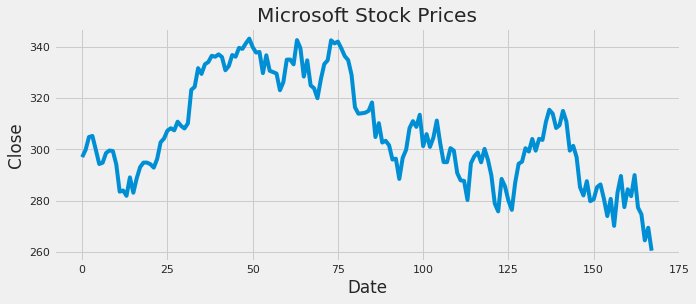

In [3]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.990020  0.986951  0.969388   0.969081 -0.288339
High       0.990020  1.000000  0.986702  0.985344   0.985586 -0.253477
Low        0.986951  0.986702  1.000000  0.986449   0.985625 -0.363314
Close      0.969388  0.985344  0.986449  1.000000   0.999781 -0.314697
Adj Close  0.969081  0.985586  0.985625  0.999781   1.000000 -0.311611
Volume    -0.288339 -0.253477 -0.363314 -0.314697  -0.311611  1.000000


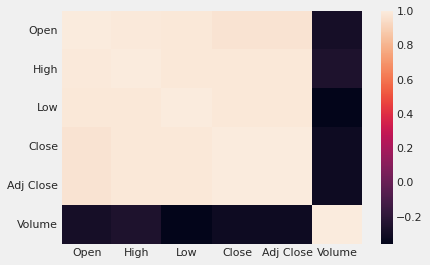

In [4]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [5]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
data.head()

,Predicted Rate
0,314.970001
1,308.230011
2,296.029999
3,311.209991
4,314.970001


In [27]:
hol = np.array(data)
m = len(ytest)
acc = np.sqrt(np.sum(np.square(ytest-hol)))/(2*m)
(1-acc)*100

70.11352339187368